<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


#  Automated Headline Compiler <a class="anchor" id="PSCRAP"></a>



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> This is the code I used for intial automation n

In [4]:
#pip install jupyter_scheduler

## Scheduler set for custom iterations using cron notation for every 30 minutes from 8am to 6pm Monday - Friday

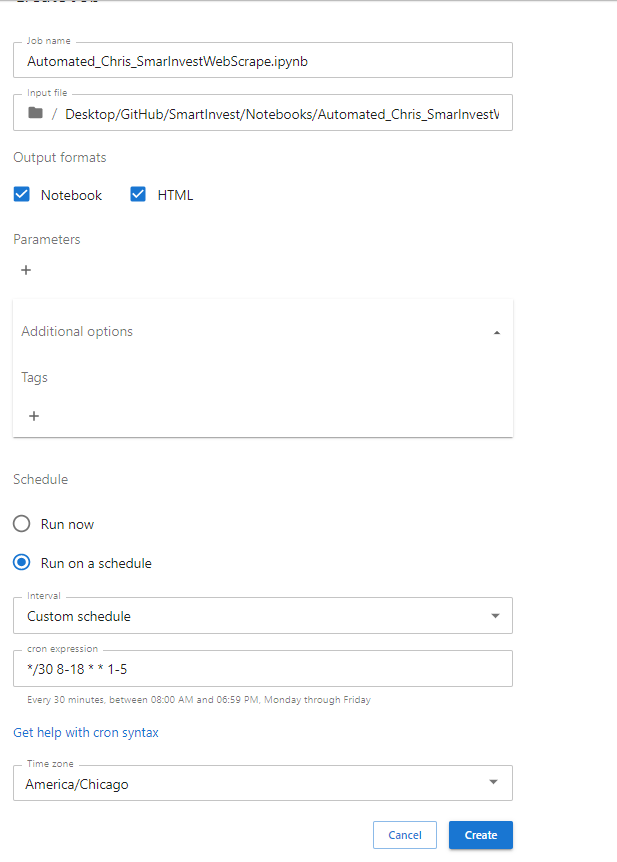

The below formats the date as:
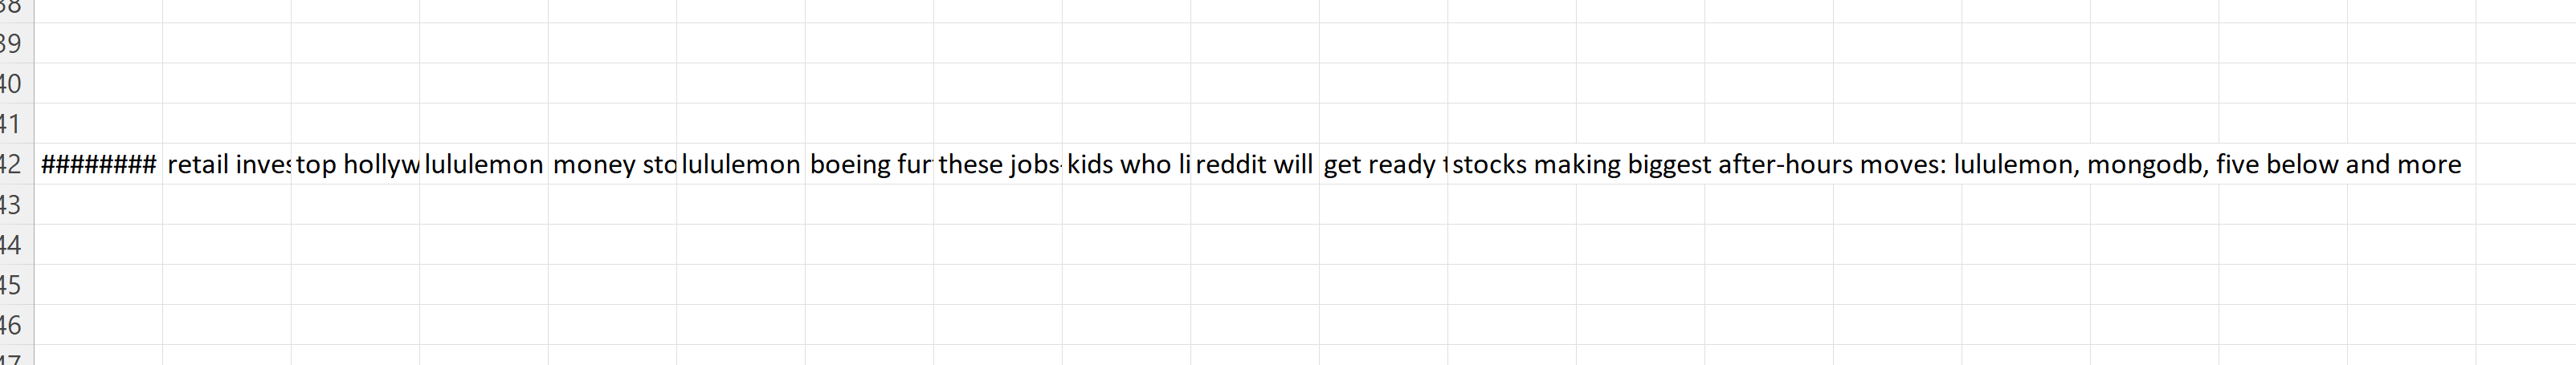

In [20]:
import datetime
import schedule
import time

# NLP Remove stop words
import nltk
from nltk.corpus import stopwords

import pandas as pd
import csv
import requests
from bs4 import BeautifulSoup
url = "https://www.cnbc.com/"

def preprocess_data(data):
    # Apply any necessary preprocessing steps
    # Remove characters not recognized by UTF-8
    data = data.encode('utf-8', errors='ignore').decode('utf-8')
    
    # For example, convert text to lowercase or capitalize the first letter of each word
    return data.lower()

     # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in data.split() if word.lower() not in stop_words]
    data = ' '.join(words)
    return data

def append_data_to_csv(url):
    file_path = "C:/Users/chris/Desktop/GitHub/SmartInvest/Data/HorizontalFormat_CV.csv"

    # Fetch the data from the URL
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    # Extract the headlines
    headlines = set()
    for headline in soup.find_all('div', class_="FeaturedCard-contentText"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    for headline in soup.find_all('div', class_="SecondaryCard-headline"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    for headline in soup.find_all('div', class_="LatestNews-headlineWrapper"):
        links = headline.find_all("a")
        for link in links:
            headlines.add(link.text.strip())

    # Process the headlines
    processed_headlines = [preprocess_data(headline) for headline in headlines]

    # Filter out null values
    non_null_headlines = [headline for headline in processed_headlines if headline]
    
    # Append the data to the CSV file
    with open(file_path, "a", newline="") as file:
        writer = csv.writer(file)

        # Check for duplicates before writing
        existing_headlines = set()
        try:
            with open(file_path, "r") as existing_file:
                existing_data = csv.reader(existing_file)
                for row in existing_data:
                    existing_headlines.update(row)
        except FileNotFoundError:
            pass

        new_headlines = set(processed_headlines) - set(existing_headlines)
        if new_headlines:
            # Add date and time block to each headline
            current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            headlines_with_datetime = [(headline, current_datetime) for headline in new_headlines]
    
            # Write the row with all headlines and the date/time
            writer.writerow([current_datetime] + list(new_headlines))



            
# Schedule the interval for collection
#schedule.every(2).hours.do(append_data_to_csv, url="https://www.cnbc.com/")


#while True:
    # Example usage
URL = "https://www.cnbc.com/"
append_data_to_csv(URL)


# To Assess Data and Check progress run "import pandas as pd" then the following two lines. 
## This will display the most recent headlines added to the "ConsolidatedHeadline_CV.csv"

In [2]:
import pandas as pd

In [16]:
test = pd.read_csv('C:/Users/chris/Desktop/GitHub/SmartInvest/Data/HorizontalFormat_CV.csv',encoding='latin-1')

In [17]:
wide_data

,2023-06-01 17:14:35,Unnamed: 1,barack obama: what 'the most successful people' do differently in their careers,actor mark wahlberg lobbies to make las vegas a hollywood in the desert,donald trump plans 2024 fundraising swing from georgia to his n.j. golf course,mongodb jumps as its beats expectations and raises guidance,"lululemon shares surge after reporting 24% sales growth, raising full-year guidance","stocks making biggest after-hours moves: lululemon, mongodb, five below and more",why do some companies have weird fiscal years that don't align with the calendar?,here's how to buy treasury bills as yields top 5%,...,microsoft signs deal with nvidia-backed coreweave to meet a.i. computing demand,'uber crowded' trades from professional investors are crushing the market,senate votes to repeal biden's student loan forgiveness plan,nyu's damodaran says he sold half his nvidia stake for one simple reason,boeing indefinitely delays starliner mission for nasa after more issues,defense spending levels threaten to delay senate plan to fast-track debt ceiling bill,cnn's new coo underscores bond between ceo chris licht and wbd boss david zaslav,medicare details plan to cover alzheimer's treatments,fortinet and more: cnbc's 'halftime report' traders answer your questions,salesforce tumbles despite strong earnings. heres what the pros say


In [28]:
import pandas as pd
import string
import re

def prepare_and_clean_data(file_path):
    # Set no max rows and columns to view data
    # pd.set_option('display.max_rows', None)
    # pd.set_option('display.max_columns', None)

    # Read the data from the CSV file
    text = pd.read_csv(file_path, encoding='latin-1')

    # Drop rows with null values
    text_Nonull = text.dropna()

    # Access the most recent row (last row added)
    most_recent_row = text_Nonull.iloc[-1]

    # Remove unwanted characters from the most recent row, ignoring NaN (column names)
    text_Nonull.iloc[-1] = text_Nonull.iloc[-1].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x) if isinstance(x, str) else x)

    # Convert all string values in the most recent row of the DataFrame to lowercase
    for row in text_Nonull.iterrows():
        if row[1][column].dtype == 'object':  # Only process columns with object dtype (string values)
            text_Nonull.at[row[0]] = row[1].lower()
        
        return text_Nonull

# Set the file path
file_path = "C:/Users/chris/Desktop/GitHub/SmartInvest/Data/HorizontalFormat_CV.csv"

# Call the function to prepare and clean the data
cleaned_data = prepare_and_clean_data(file_path)

# Print the cleaned data
print(cleaned_data.head())

cleaned_data.to_csv('C:/Users/chris/Desktop/GitHub/SmartInvest/Data/Clean_Headlines_CV.csv')

IndexError: single positional indexer is out-of-bounds

In [21]:
clean= pd.read_csv('C:/Users/chris/Desktop/GitHub/SmartInvest/Data/Clean_Headlines_CV.csv')

In [25]:
clean.columns

Index(['Unnamed: 0', '2023-06-01 15:41:56'], dtype='object')

In [44]:

text_Nonull.drop(text_Nonull.columns[1], axis=1, inplace=True)

In [45]:
text_Nonull.head()

,2023-06-01 16:58:44,amazon's north america fulfillment head is leaving,here's what to watch out for in friday's jobs report for may,salesforce tumbles despite strong earnings. heres what the pros say,nyu's damodaran says he sold half his nvidia stake for one simple reason,"money stored in payment apps such as venmo may be more vulnerable, cfpb says",cnn's new coo underscores bond between ceo chris licht and wbd boss david zaslav,reddit will charge fees to millions of third-party apps that access its data,"stocks making biggest after-hours moves: lululemon, mongodb, five below and more",why do some companies have weird fiscal years that don't align with the calendar?,...,senate votes to repeal biden's student loan forgiveness plan,medicare details plan to cover alzheimer's treatments,"get ready to sell nasdaq stocks, according to wall street seasonal theory",here's why diddy is suing diageo over his vodka and tequila brands,here's what earnings from industry rivals mean for two club names,fortinet and more: cnbc's 'halftime report' traders answer your questions,"top hollywood exec made $498 million in 5 years, while writer pay dropped",why apple's vr headset could succeed where every similar product has failed,actor mark wahlberg lobbies to make las vegas a hollywood in the desert,defense spending levels threaten to delay senate plan to fast-track debt ceiling bill


In [50]:
# # Assuming you have a DataFrame called "text_Nonull" with the first column as column names
# # and the remaining columns containing the values

# # Set the first column as the index
# text_Nonull.set_index(text_Nonull.columns[0], inplace=True)

# # Reset the index to convert the column names to a regular column
# text_Nonull.reset_index(inplace=True)

# # Convert wide-format data to long format
# long_data = pd.melt(text_Nonull, id_vars=text_Nonull.columns[0], var_name='variable', value_name='value')

# print(long_data)

Empty DataFrame
Columns: [2023-06-01 16:58:44, variable, value]
Index: []


In [51]:
long_data

,2023-06-01 16:58:44,variable,value


In [4]:
flip = pd.melt(test)

In [5]:
flip.head()

,variable,value
